En este humilde proyecto de análisis de datos, me propongo analizar la situación inmobiliaria de la Ciudad Autónoma de Buenos Aires.

Importo las librerias correspondientes.

In [ ]:
import pandas as pd

#Librerias para graficar
import matplotlib.pyplot as plt
import seaborn as sns

Creo el dataframe y lo llamo para tener un pantallazo del contenido con el que voy a trabajar.

In [ ]:
propiedades="https://raw.githubusercontent.com/bloisejuli/Datos1-CUDI/main/datasets/properati_argentina_2021.csv"
df = pd.read_csv(propiedades)
df

,id,start_date,end_date,created_on,latitud,longitud,place_l2,place_l3,place_l4,place_l5,place_l6,operation,property_type,property_rooms,property_bedrooms,property_surface_total,property_surface_covered,property_price,property_currency,property_title
0,XZq2dFGxBiboHY3Bo/tqlw==,2021-09-09,2022-01-27,2021-09-09,-38.957632,-68.105443,Neuquén,NaN,NaN,NaN,NaN,Venta,Casa,6.0,NaN,NaN,206.0,NaN,NaN,Casa - Capital
1,8afoK+yMH/rnnlYiktwgNA==,2021-09-09,2021-10-23,2021-09-09,-34.888878,-56.092368,Montevideo,NaN,NaN,NaN,NaN,Venta,Casa,4.0,3.0,193.0,193.0,390000.0,USD,Casa - Malvín
2,iVaG5rBB47dd1Ya4BMXREA==,2021-09-09,2022-03-09,2021-09-09,-32.488717,-58.257499,Entre Ríos,NaN,NaN,NaN,NaN,Venta,Casa,NaN,NaN,110.0,45.0,47000.0,USD,Casa - Uruguay
3,QE1QVMWKAHWkd0qT0FtPWA==,2021-09-09,2022-01-27,2021-09-09,-34.900165,-54.808453,Maldonado,NaN,NaN,NaN,NaN,Venta,Casa,NaN,3.0,NaN,180.0,400000.0,USD,Casa - El Chorro
4,tJ5lSk7IysG/71OGhacNZA==,2021-09-09,2022-01-27,2021-09-09,-38.954528,-68.041862,Neuquén,NaN,NaN,NaN,NaN,Venta,PH,3.0,2.0,NaN,98.0,102000.0,USD,PH - Villa Farrell
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
460149,EWHC/xcODFkeEA0+pPE6Rw==,2021-01-05,2021-01-08,2021-01-05,-34.599594,-58.588715,Bs.As. G.B.A. Zona Oeste,Tres de Febrero,NaN,NaN,NaN,Venta,Local comercial,NaN,NaN,113.0,113.0,190000.0,USD,LOCAL COMERCIAL MAS DE 100 MTS. - Ciudad jardín-
460150,txKUq0LjMaORjJQeeqTOfw==,2021-01-05,2021-11-01,2021-01-05,-34.582777,-58.545220,Bs.As. G.B.A. Zona Norte,General San Martín,Villa Lynch,NaN,NaN,Venta,Local comercial,NaN,NaN,11580.0,11580.0,3500000.0,USD,Nave Industrial - Villa Lynch
460151,E0zwHT18DX8AxhU22hXgng==,2021-01-05,2021-03-01,2021-01-05,NaN,NaN,Bs.As. G.B.A. Zona Norte,General San Martín,NaN,NaN,NaN,Venta,Local comercial,NaN,NaN,915.0,915.0,800000.0,USD,importante edificio comercial en tres plantas ...
460152,Ec4Tvy/WX5f6RgfaJf2FHQ==,2021-01-05,2021-11-28,2021-01-05,-33.226234,-60.331848,Santa Fe,Villa Constitución,NaN,NaN,NaN,Alquiler,Local comercial,NaN,NaN,NaN,15.0,NaN,NaN,Local - Villa Constitucion


Voy a cambiar el Id por numeros enteros auto incrementables.
<br>
Para esto voy a  eliminar la columna id actual y reemplazarla por una nueva que cumpla con mi objetivo.

In [ ]:
df = df.drop('id', axis=1)

In [ ]:
# Creo la nueva columna 'Id' con números enteros autoincrementables
df['Id'] = range(1, len(df) + 1)

# Muevo la columna 'Id' al principio del DataFrame
columnas = ['Id'] + [col for col in df if col != 'Id']
df = df[columnas]

Utilizo ".info()" para ver las caracteristicas del dataframe y encontrar valores nulos.

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 460154 entries, 0 to 460153
Data columns (total 20 columns):
 #   Column                    Non-Null Count   Dtype  
---  ------                    --------------   -----  
 0   Id                        460154 non-null  int64  
 1   start_date                460154 non-null  object 
 2   end_date                  460154 non-null  object 
 3   created_on                460154 non-null  object 
 4   latitud                   419740 non-null  float64
 5   longitud                  419740 non-null  float64
 6   place_l2                  460154 non-null  object 
 7   place_l3                  437665 non-null  object 
 8   place_l4                  139020 non-null  object 
 9   place_l5                  2430 non-null    object 
 10  place_l6                  0 non-null       float64
 11  operation                 460154 non-null  object 
 12  property_type             460154 non-null  object 
 13  property_rooms            368498 non-null  f

Para empezar, quiero ver que tipo de operaciones se realizan. Para eso, voy a contar los datos por su operación con ".value_counts()".

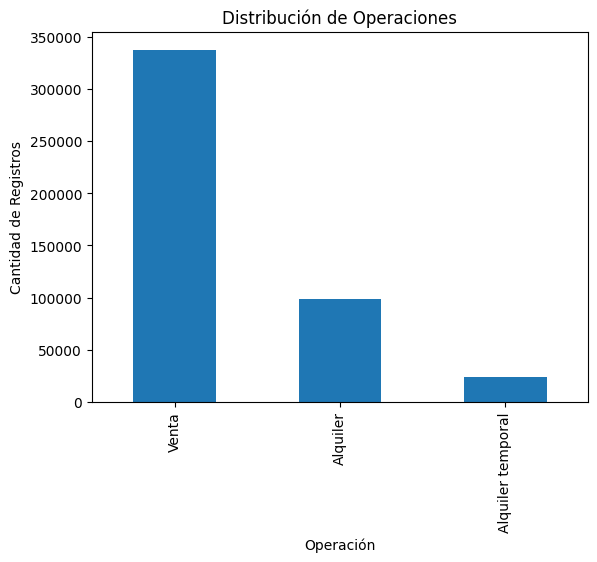

In [ ]:
operacion= df['operation'].value_counts()
operacion.plot(kind='bar')
plt.xlabel('Operación')
plt.ylabel('Cantidad de Registros')
plt.title('Distribución de Operaciones')
plt.show()

Hago lo mismo pero con los tipos de viviendas.

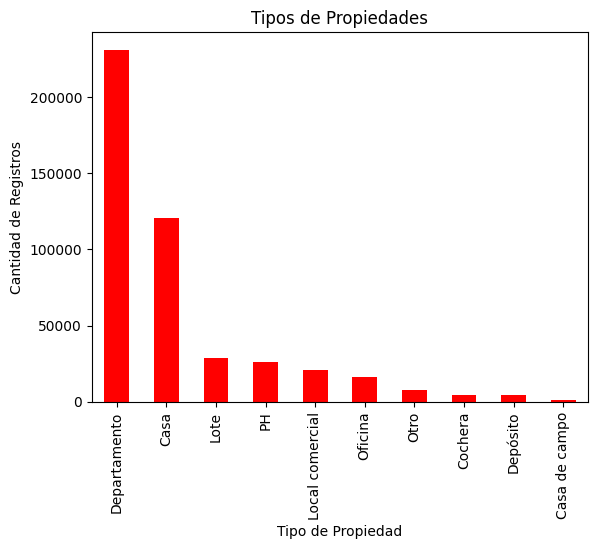

In [ ]:
operacion= df['property_type'].value_counts()
operacion.plot(kind='bar',color="red")
plt.xlabel('Tipo de Propiedad')
plt.ylabel('Cantidad de Registros')
plt.title('Tipos de Propiedades')
plt.show()

Voy a mostrar como se distribuye el tipo de moneda utilizada en las operaciones.
Primero voy a crear una variable para guardar el tipo de moneda, esto lo hago con ".value_counts()" y luego voy a crear un grafico de barras.

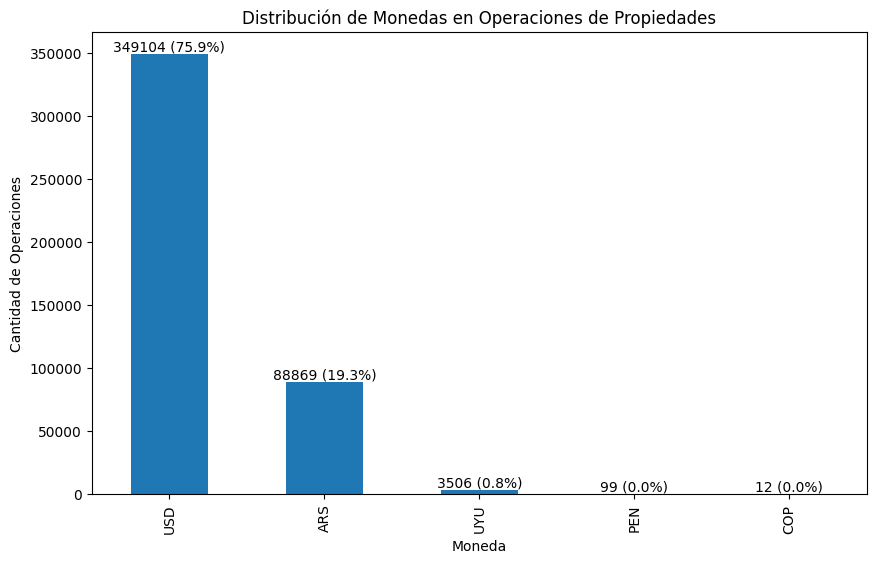

In [ ]:
tipo_moneda = df['property_currency'].value_counts()
plt.figure(figsize=(10, 6))
tipo_moneda.plot(kind='bar')

for i, count in enumerate(tipo_moneda):
    plt.text(i, count, f'{count} ({count/len(df)*100:.1f}%)', ha='center', va='bottom')

plt.title('Distribución de Monedas en Operaciones de Propiedades')
plt.xlabel('Moneda')
plt.ylabel('Cantidad de Operaciones')

plt.show()

Del anterior grafico, podemos apreciar como 3/4 partes del mercado inmobiliario argentino esta dolarizado.
Esto dificulta el acceso a una vivienda debido a la precaria situacion economica y laboral.

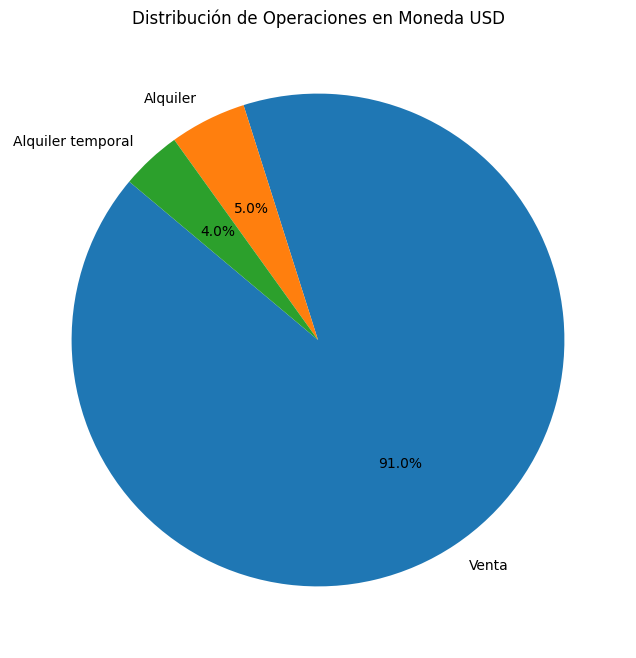

In [ ]:
operaciones_en_usd = df[df['property_currency'] == 'USD']

plt.figure(figsize=(8, 8))
plt.pie(operaciones_en_usd['operation'].value_counts(), labels=operaciones_en_usd['operation'].value_counts().index, autopct='%1.1f%%', startangle=140)

plt.title('Distribución de Operaciones en Moneda USD')

plt.show()

Primero, voy a filtrar las propiedades segun su tipo de vivienda, quiero obtener las que son Casa, PH y Departamento.

In [ ]:
viviendas = df[df['property_type'].isin(['Casa', 'PH', 'Departamento'])]

Ahora, las filtro según su ubicación, quiero las de Capital Federal.

In [ ]:
capital_federal = viviendas[viviendas['place_l2'] == 'Capital Federal']

Para terminar, filtro las propiedades por su operación para trabajar con las propiedades que esten en venta y cuyo precio esté en USD.

In [ ]:
propiedades_venta_usd = capital_federal[(capital_federal['operation'] == 'Venta') & (capital_federal['property_currency'] == 'USD')]

Para trabajar comodamente, voy a crear un nuevo dataframe con la información filtrada previamente.

In [ ]:
nuevo_df = propiedades_venta_usd[['Id','property_type', 'place_l2','place_l3','property_rooms','property_bedrooms','property_surface_total','property_surface_covered','property_price', 'property_currency']]

In [ ]:
nuevo_df

,Id,property_type,place_l2,place_l3,property_rooms,property_bedrooms,property_surface_total,property_surface_covered,property_price,property_currency
25,26,Casa,Capital Federal,NaN,4.0,3.0,171.0,133.0,210000.0,USD
42,43,Departamento,Capital Federal,Boca,3.0,2.0,58.0,55.0,82900.0,USD
43,44,Departamento,Capital Federal,Boca,4.0,3.0,70.0,70.0,99000.0,USD
49,50,Departamento,Capital Federal,Once,4.0,2.0,NaN,104.0,146000.0,USD
51,52,PH,Capital Federal,Boedo,4.0,2.0,NaN,73.0,250000.0,USD
...,...,...,...,...,...,...,...,...,...,...
460072,460073,Departamento,Capital Federal,Villa del Parque,4.0,3.0,130.0,100.0,220000.0,USD
460073,460074,Departamento,Capital Federal,Villa del Parque,3.0,2.0,68.0,60.0,161000.0,USD
460074,460075,Departamento,Capital Federal,Villa del Parque,1.0,1.0,51.0,30.0,75500.0,USD
460075,460076,Departamento,Capital Federal,Villa del Parque,1.0,1.0,37.0,31.0,74500.0,USD


Por cuestiones de gusto personal, voy a cambiar los nombres de las columnas.

In [ ]:
nuevo_df.columns = ['ID','Tipo_Vivienda', 'Ubicación','Barrio', 'Cantidad_Ambientes','Cantidad_Habitaciones','Superficie_Total','Superficie_Cubierta','Precio','Moneda']

In [ ]:
nuevo_df

,ID,Tipo_Vivienda,Ubicación,Barrio,Cantidad_Ambientes,Cantidad_Habitaciones,Superficie_Total,Superficie_Cubierta,Precio,Moneda
25,26,Casa,Capital Federal,NaN,4.0,3.0,171.0,133.0,210000.0,USD
42,43,Departamento,Capital Federal,Boca,3.0,2.0,58.0,55.0,82900.0,USD
43,44,Departamento,Capital Federal,Boca,4.0,3.0,70.0,70.0,99000.0,USD
49,50,Departamento,Capital Federal,Once,4.0,2.0,NaN,104.0,146000.0,USD
51,52,PH,Capital Federal,Boedo,4.0,2.0,NaN,73.0,250000.0,USD
...,...,...,...,...,...,...,...,...,...,...
460072,460073,Departamento,Capital Federal,Villa del Parque,4.0,3.0,130.0,100.0,220000.0,USD
460073,460074,Departamento,Capital Federal,Villa del Parque,3.0,2.0,68.0,60.0,161000.0,USD
460074,460075,Departamento,Capital Federal,Villa del Parque,1.0,1.0,51.0,30.0,75500.0,USD
460075,460076,Departamento,Capital Federal,Villa del Parque,1.0,1.0,37.0,31.0,74500.0,USD


# Variables Cuantitativas

Voy a analizar las variables cuantitativas.
Estas son:  
  *   Cantidad_Ambientes
  *   Cantidad_Habitaciones
  *   Superficie_Total
  *   Superficie_Cubierta
  *   Precio



### Cantidad_Ambientes

Calculo la media:

In [ ]:
nuevo_df['Cantidad_Ambientes'].mean()

2.8227992060511777

Calculo la mediana:

In [ ]:
nuevo_df['Cantidad_Ambientes'].median()

3.0

Calculo el 1er cuatril:

In [ ]:
nuevo_df['Cantidad_Ambientes'].quantile(0.25)

2.0

Calculo el 2do cuatril:

In [ ]:
nuevo_df['Cantidad_Ambientes'].quantile(0.50)

3.0

Calculo el 3er cuatril:

In [ ]:
nuevo_df['Cantidad_Ambientes'].quantile(0.75)

4.0

Calculo la moda:

In [ ]:
nuevo_df['Cantidad_Ambientes'].mode()

0    3.0
Name: Cantidad_Ambientes, dtype: float64

Calculo el minimo:

In [ ]:
minimo=nuevo_df['Cantidad_Ambientes'].min()
minimo

1.0

Calculo el maximo:

In [ ]:
maximo=nuevo_df['Cantidad_Ambientes'].max()
maximo

40.0

Calculo el rango:

In [ ]:
rango=maximo-minimo
rango

39.0

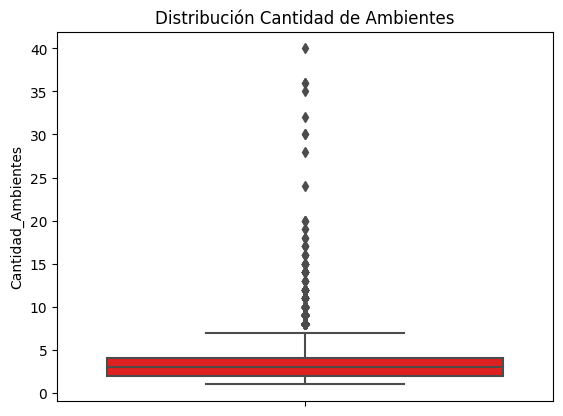

In [ ]:
sns.boxplot(y=nuevo_df['Cantidad_Ambientes'], color="red").set(title="Distribución Cantidad de Ambientes")
plt.show()

### Cantidad_Habitaciones

Calculo la media:

In [ ]:
nuevo_df['Cantidad_Habitaciones'].mean()

2.0146285220148448

Calculo la mediana:

In [ ]:
nuevo_df['Cantidad_Habitaciones'].median()

2.0

Calculo el 1er cuatril:

In [ ]:
nuevo_df['Cantidad_Habitaciones'].quantile(0.25)

1.0

Calculo el 2do cuatril:

In [ ]:
nuevo_df['Cantidad_Habitaciones'].quantile(0.50)

2.0

Calculo el 3er cuatril:

In [ ]:
nuevo_df['Cantidad_Habitaciones'].quantile(0.75)

3.0

Calculo la moda:

In [ ]:
nuevo_df['Cantidad_Habitaciones'].mode()

0    1.0
Name: Cantidad_Habitaciones, dtype: float64

Calculo el minimo:

In [ ]:
minimo=nuevo_df['Cantidad_Habitaciones'].min()
minimo

-1.0

Calculo el maximo:

In [ ]:
maximo=nuevo_df['Cantidad_Habitaciones'].max()
maximo

70.0

Calculo el rango:

In [ ]:
rango=maximo-minimo
rango

71.0

Me dió que el minimo es -1, asi que busco este valor para poder ver la fila

In [ ]:
habitacion_negativa = nuevo_df[nuevo_df['Cantidad_Habitaciones'] == -1]
habitacion_negativa

,ID,Tipo_Vivienda,Ubicación,Barrio,Cantidad_Ambientes,Cantidad_Habitaciones,Superficie_Total,Superficie_Cubierta,Precio,Moneda
406880,3WI+zCCMeb9TR5kOBm7rhg==,Departamento,Capital Federal,Villa Urquiza,2.0,-1.0,61.0,43.0,125000.0,USD


Puedo ver que es un Departamento  con dos ambientes valuado en 125 mil USD.
El dato que tengo es que la propiedad no solo no tiene un baño, si no que "debe" uno. Asumo que es un error a la hora de cargar el dato.

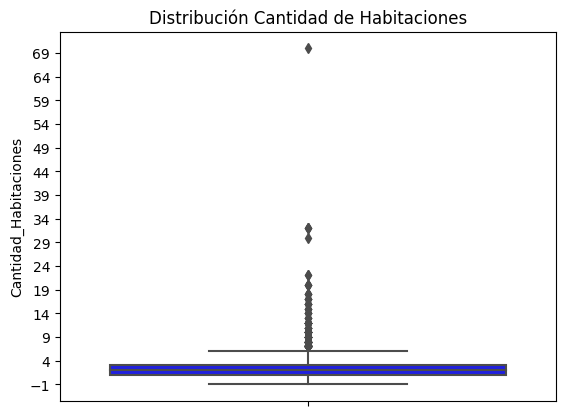

In [ ]:
sns.boxplot(y=nuevo_df['Cantidad_Habitaciones'], color="blue").set(title="Distribución Cantidad de Habitaciones")
plt.yticks(range(int(nuevo_df['Cantidad_Habitaciones'].min()), int(nuevo_df['Cantidad_Habitaciones'].max()) + 1,5))
plt.show()

### Superficie_Total

Calculo la media:

In [ ]:
nuevo_df['Superficie_Total'].mean()

109.09297019182372

Calculo la mediana:

In [ ]:
nuevo_df['Superficie_Total'].median()

65.0

Calculo el 1er cuatril:

In [ ]:
nuevo_df['Superficie_Total'].quantile(0.25)

45.0

Calculo el 2do cuatril:

In [ ]:
nuevo_df['Superficie_Total'].quantile(0.50)

65.0

Calculo el 3er cuatril:

In [ ]:
nuevo_df['Superficie_Total'].quantile(0.75)

105.0

Calculo la moda:

In [ ]:
nuevo_df['Superficie_Total'].mode()

0    50.0
Name: Superficie_Total, dtype: float64

Calculo el minimo:

In [ ]:
minimo=nuevo_df['Superficie_Total'].min()
minimo

10.0

Calculo el maximo:

In [ ]:
maximo=nuevo_df['Superficie_Total'].max()
maximo

137000.0

Calculo el rango:

In [ ]:
rango=maximo-minimo
rango

136990.0

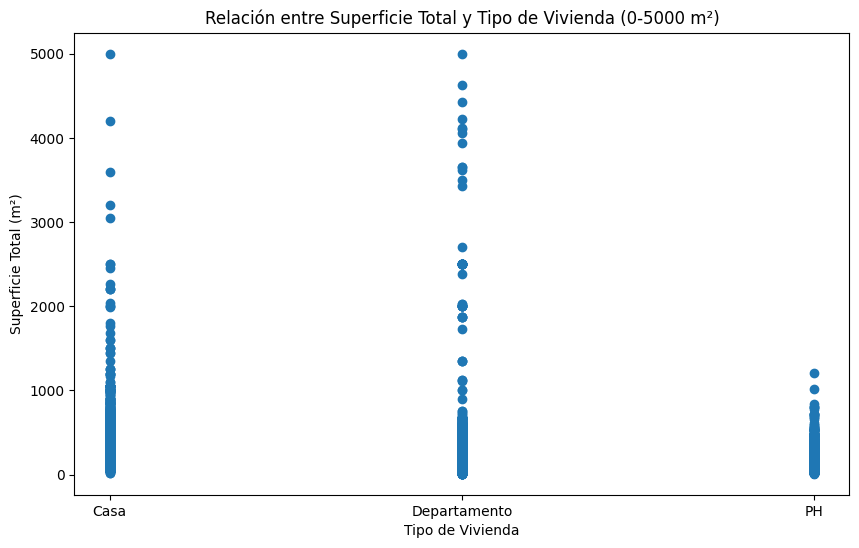

In [ ]:
# Filtro las filas donde la Superficie_Total está entre 0 y 5000 metros cuadrados y el Tipo_Vivienda es Casa, PH o Departamento
df_filtrado = nuevo_df[(nuevo_df['Superficie_Total'] >= 0) & (nuevo_df['Superficie_Total'] <= 5000) & (nuevo_df['Tipo_Vivienda'].isin(['Casa','PH','Departamento']))]

# Creo el gráfico de dispersión
plt.figure(figsize=(10, 6))
plt.scatter(df_filtrado['Tipo_Vivienda'], df_filtrado['Superficie_Total'])
plt.xlabel('Tipo de Vivienda')
plt.ylabel('Superficie Total (m²)')
plt.title('Relación entre Superficie Total y Tipo de Vivienda (0-5000 m²)')
plt.show()

De este grafico podemos apreciar como la gran mayoria de las propiedades tiene menos de 2000 m².
En el caso particular de los Departamentos y Ph, se puede deducir que tienen hasta un aproximado de 800 m², siendo escasos los casos donde superan este promedio.

### Superficie_Cubierta

Calculo la media:

In [ ]:
nuevo_df['Superficie_Cubierta'].mean()

87.93193244952968

Calculo la mediana:

In [ ]:
nuevo_df['Superficie_Cubierta'].median()

58.0

Calculo el 1er cuatril:

In [ ]:
nuevo_df['Superficie_Cubierta'].quantile(0.25)

40.0

Calculo el 2do cuatril:

In [ ]:
nuevo_df['Superficie_Cubierta'].quantile(0.50)

58.0

Calculo el 3er cuatril:

In [ ]:
nuevo_df['Superficie_Cubierta'].quantile(0.75)

88.0

Calculo la moda:

In [ ]:
nuevo_df['Superficie_Cubierta'].mode()

0    40.0
Name: Superficie_Cubierta, dtype: float64

Calculo el minimo:

In [ ]:
minimo=nuevo_df['Superficie_Cubierta'].min()
minimo

1.0

Calculo el maximo:

In [ ]:
maximo=nuevo_df['Superficie_Cubierta'].max()
maximo

217000.0

Calculo el rango:

In [ ]:
rango=maximo-minimo
rango

216999.0

<ipython-input-51-a776dd4308cc>:2: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar=None` for the same effect.

  sns.barplot(data=nuevo_df, x='Tipo_Vivienda', y='Superficie_Cubierta',ci=None)  # El parámetro ci=None evita que se muestren intervalos de confianza


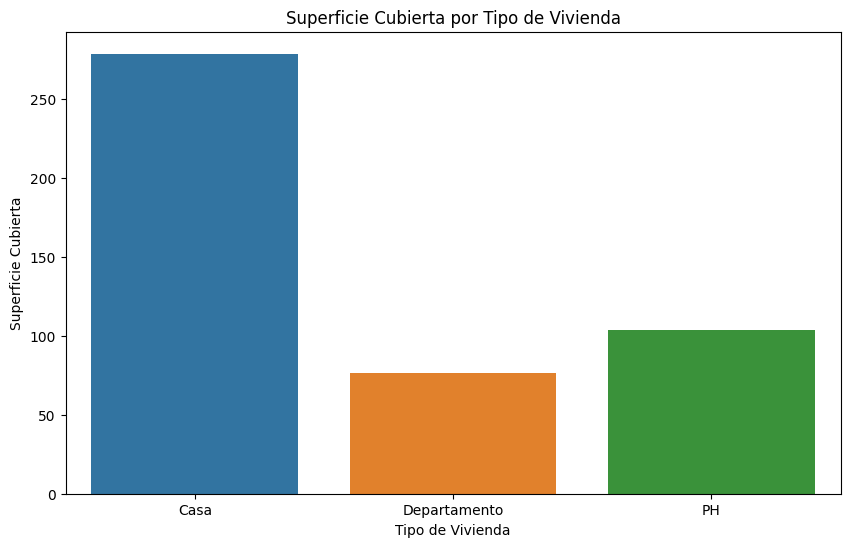

In [ ]:
plt.figure(figsize=(10, 6))
sns.barplot(data=nuevo_df, x='Tipo_Vivienda', y='Superficie_Cubierta',ci=None)  # El parámetro ci=None evita que se muestren intervalos de confianza

plt.title('Superficie Cubierta por Tipo de Vivienda')
plt.xlabel('Tipo de Vivienda')
plt.ylabel('Superficie Cubierta')

plt.show()

Podemos ver como la Casa es el tipo de vivienda que mayor superficie tiene cubierta, seguida por el PH y luego por el Deaprtamento.
Esto se explica porque los departamentos, en el mejor de los casos, solo gozan de un balcón.

### Precio

Calculo la media:

In [ ]:
nuevo_df['Precio'].mean()

226238.20718522213

Calculo la mediana:

In [ ]:
nuevo_df['Precio'].median()

143900.0

Calculo el 1er cuatril:

In [ ]:
nuevo_df['Precio'].quantile(0.25)

95000.0

Calculo el 2do cuatril:

In [ ]:
nuevo_df['Precio'].quantile(0.50)

143900.0

Calculo el 3er cuatril:

In [ ]:
nuevo_df['Precio'].quantile(0.75)

237000.0

Calculo la moda:

In [ ]:
nuevo_df['Precio'].mode()

0    110000.0
Name: Precio, dtype: float64

Calculo el minimo:

In [ ]:
minimo=nuevo_df['Precio'].min()
minimo

5000.0

Calculo el maximo:

In [ ]:
maximo=nuevo_df['Precio'].max()
maximo

21400000.0

Calculo el rango:

In [ ]:
rango=maximo-minimo
rango

21395000.0

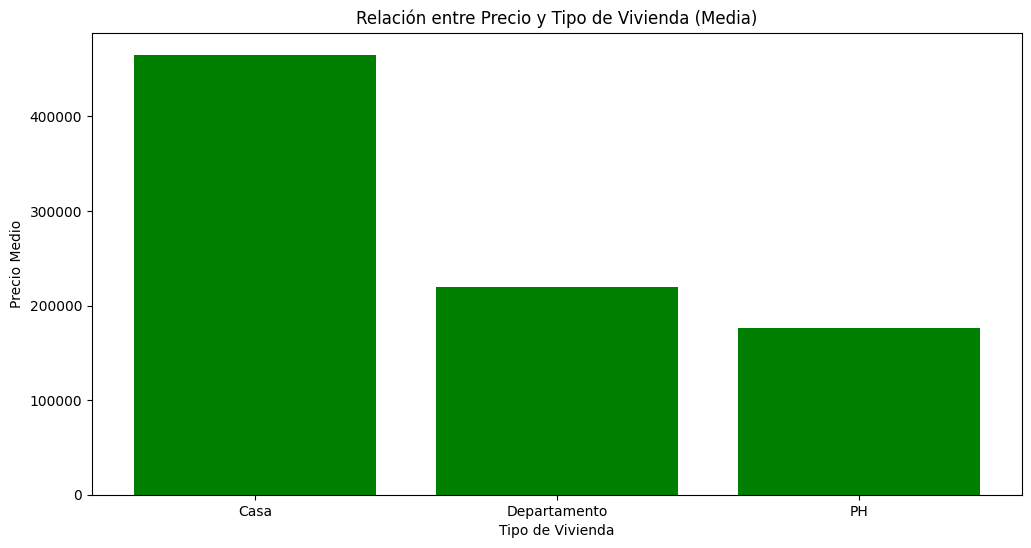

In [ ]:
# Calculo la media del precio para cada tipo de vivienda
media_precio =nuevo_df.groupby('Tipo_Vivienda')['Precio'].mean().reset_index()

# Creo el gráfico de barras
plt.figure(figsize=(12, 6))
plt.bar(media_precio['Tipo_Vivienda'], media_precio['Precio'], color='green')

# Agrego información
plt.title('Relación entre Precio y Tipo de Vivienda (Media)')
plt.xlabel('Tipo de Vivienda')
plt.ylabel('Precio Medio')

plt.show()

Podemos apreciar que las propiedades más caras son las Casas.
Esto puede deberse a sus caracteristicas, como es su ubicación, su superficie, su cantidad de ambientes, etc.

# Variables Cualitativas

Al haber creado un nuevo dataset, las unicas variables cualitativas que me quedan son 'Tipo_Vivienda' y 'Barrio', ya que 'Ubicacion' siempre es 'Capital Federal'.
Voy a analizar como se relacionan estas dos variables potables entre ellas y como se comportan de acuerdo a las variables cuantitativas.

Para empezar, voy a mostrar los principales barrios donde tengo propiedades.
<br>
***Robar código es mi pasión***

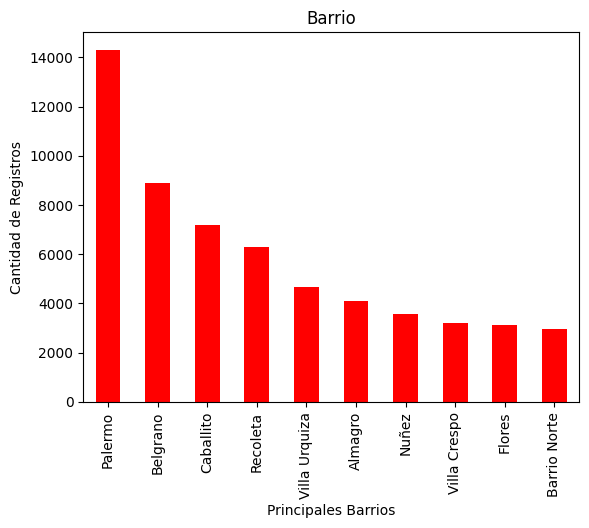

In [ ]:
operacion= nuevo_df['Barrio'].value_counts().head(10)
operacion.plot(kind='bar',color="red")
plt.xlabel('Principales Barrios')
plt.ylabel('Cantidad de Registros')
plt.title('Barrio')
plt.show()

Voy a mostrar que tipo de vivienda es más cara en el principal barrio (Palermo)
 y luego voy a hacer lo mismo con 'Barrio Norte'

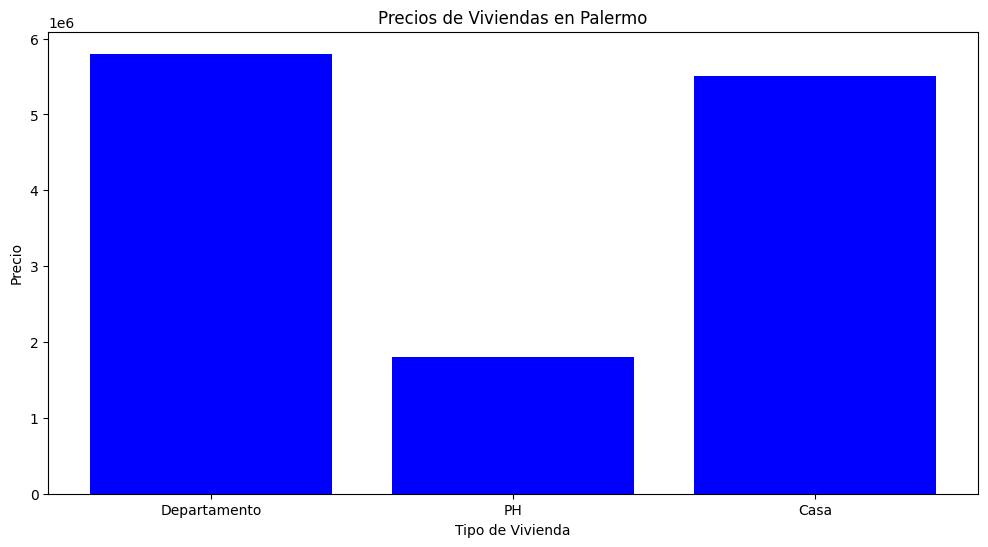

In [ ]:
# Filtro las filas donde el barrio es 'Palermo'
df_palermo = nuevo_df[nuevo_df['Barrio'] == 'Palermo']

plt.figure(figsize=(12, 6))
plt.bar(df_palermo['Tipo_Vivienda'], df_palermo['Precio'], color='blue')

plt.title('Precios de Viviendas en Palermo')
plt.xlabel('Tipo de Vivienda')
plt.ylabel('Precio')

plt.show()

Podemos apreciar que, por escasa porporción, los Departamentos son más caros que las casas.
<br>
Esto puede deberse a que el barrio porteño de Palermo no cuenta con el suficiente territorio para gozar de barrios con casas. Para hacerle frente a esta situación, Palermo utiliza edificios divididos en Departamentos.

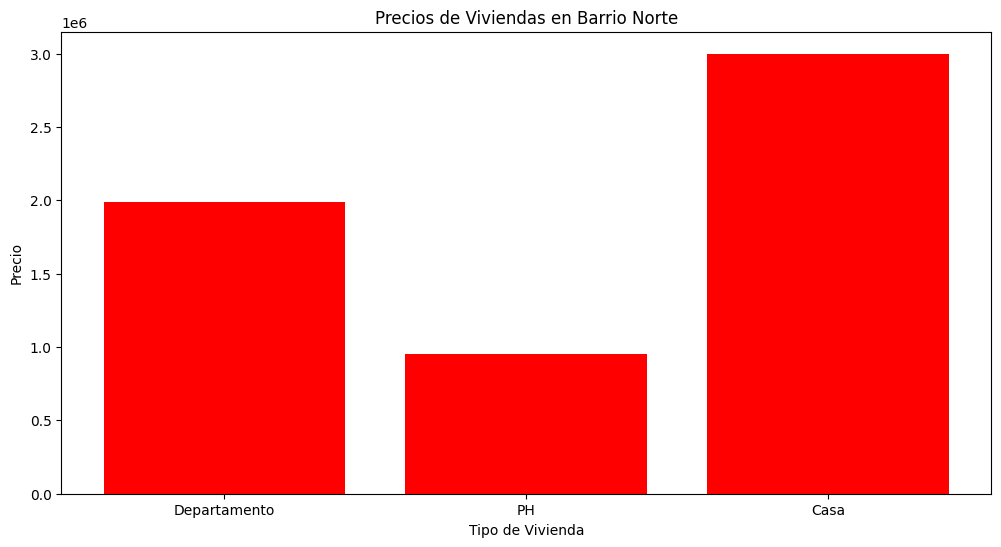

In [ ]:
# Filtro las filas donde el barrio es 'Barrio Norte'
df_BN = nuevo_df[nuevo_df['Barrio'] == 'Barrio Norte']

plt.figure(figsize=(12, 6))
plt.bar(df_BN['Tipo_Vivienda'], df_BN['Precio'], color='red')

plt.title('Precios de Viviendas en Barrio Norte')
plt.xlabel('Tipo de Vivienda')
plt.ylabel('Precio')

plt.show()

En Barrio Norte, el tipo de vivienda más cara es la Casa, posiblemente a las diferencias en materia de infraestructura.
<br>
Es de destacar la diferencia de precios. Es mucho más cara una propiedad en Palermo que en Barrio Norte

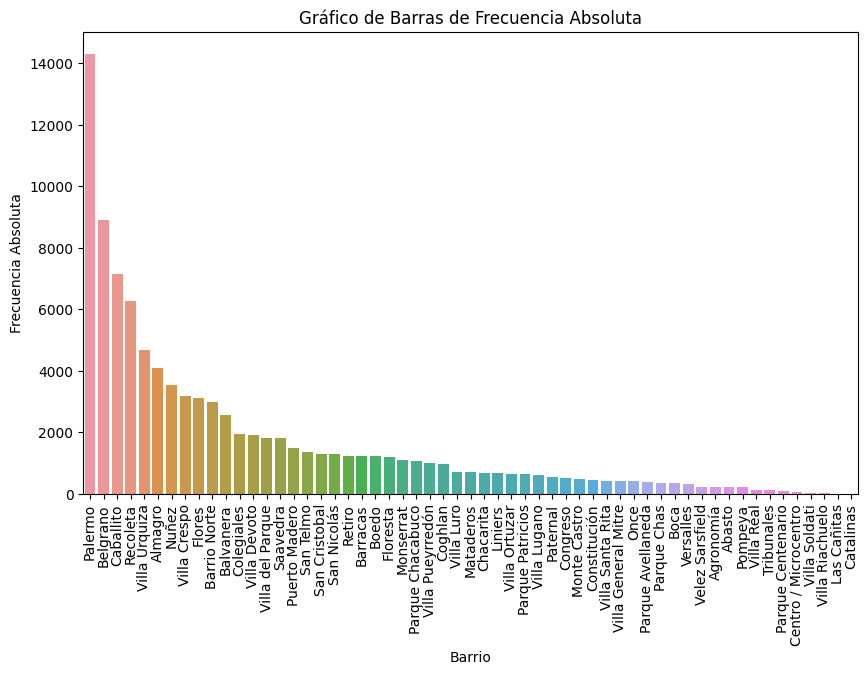

In [ ]:
# Calculo la frecuencia absoluta
frecuencia_absoluta = nuevo_df['Barrio'].value_counts()

# Calculo la frecuencia relativa
frecuencia_relativa = nuevo_df['Barrio'].value_counts(normalize=True)

# Creo un gráfico de barras
plt.figure(figsize=(10, 6))
sns.barplot(x=frecuencia_absoluta.index, y=frecuencia_absoluta.values)
plt.xticks(rotation=90)
plt.title('Gráfico de Barras de Frecuencia Absoluta')
plt.xlabel('Barrio')
plt.ylabel('Frecuencia Absoluta')
plt.show()

En el grafico anterior podemos apreciar como la mayor cantidad de oferta se da en los barrios más caros, generalmente. Quiza se deba, entre otros potenciales motivos, a los altos precios en los que oscilan las propiedades.

Voy a crear una tabla para poder ver cuantas propiedades de los 3 tipos (Casa, Departamento,PH) tengo en cada barrio.

In [ ]:
# Creo una tabla de contingencia (crosstab) entre 'Barrio' y 'Tipo_Vivienda'
tabla_contingencia = pd.crosstab(nuevo_df['Barrio'], nuevo_df['Tipo_Vivienda'], margins=True, margins_name='Total')

# Muestro la tabla de contingencia y los porcentajes relativos
print("Tabla de Contingencia:")
print(tabla_contingencia)


Tabla de Contingencia:
Tipo_Vivienda         Casa  Departamento    PH  Total
Barrio                                               
Abasto                   5           221     5    231
Agronomía               28           116    91    235
Almagro                 37          3695   349   4081
Balvanera               23          2347   183   2553
Barracas                87           964   195   1246
Barrio Norte            22          2909    44   2975
Belgrano               242          8423   233   8898
Boca                    26           287    52    365
Boedo                   82           868   287   1237
Caballito              162          6449   557   7168
Catalinas                1             6     0      7
Centro / Microcentro     0            74     2     76
Chacarita               32           573    92    697
Coghlan                 67           799   118    984
Colegiales              75          1630   246   1951
Congreso                 2           513    20    535
Const

Viendo los totales, podemos ver como hay más oferta de Departamentos.
<br>
Si vamos al dataframe (*nuevo_df*) nos encontramos con que tenemos **94249**, pero en el total tenemos **93832**, es decir una diferencia de **417** registros. Interpreto que son los registros vacios en la columna 'Barrio'. <br>
Para chequear esto, voy a pedir que me muestre los registros vacios en dicha columna.

In [ ]:
# Cuento el total de filas con valores nulos en la columna 'Barrio'
total_nulos_barrio = nuevo_df['Barrio'].isnull().sum()

print(f"Total de filas con valores nulos en la columna 'Barrio': {total_nulos_barrio}")

Total de filas con valores nulos en la columna 'Barrio': 417


Efectivamente, la diferencia entre el total de propiedades y del total del dataframe son los datos nulos.

Antes de seguir, quiero mostrar el porcentaje de datos nulos en mi df

In [ ]:
porcentaje_datos_nulos = (nuevo_df.isnull().sum().sum() / (nuevo_df.shape[0] * nuevo_df.shape[1])) * 100

print(f"Porcentaje de datos nulos en el DataFrame: {porcentaje_datos_nulos:.2f}%")

Porcentaje de datos nulos en el DataFrame: 2.19%


### Datos nulos por columna

In [ ]:
porcentaje_datos_nulos_por_columna = (nuevo_df.isnull().sum() / len(nuevo_df)) * 100

# Muestro el porcentaje de datos nulos por columna
print("Porcentaje de datos nulos por columna:")
print(porcentaje_datos_nulos_por_columna)

Porcentaje de datos nulos por columna:
ID                        0.000000
Tipo_Vivienda             0.000000
Ubicación                 0.000000
Barrio                    0.442445
Cantidad_Ambientes        1.107704
Cantidad_Habitaciones    11.657418
Superficie_Total          5.139577
Superficie_Cubierta       3.558658
Precio                    0.000000
Moneda                    0.000000
dtype: float64


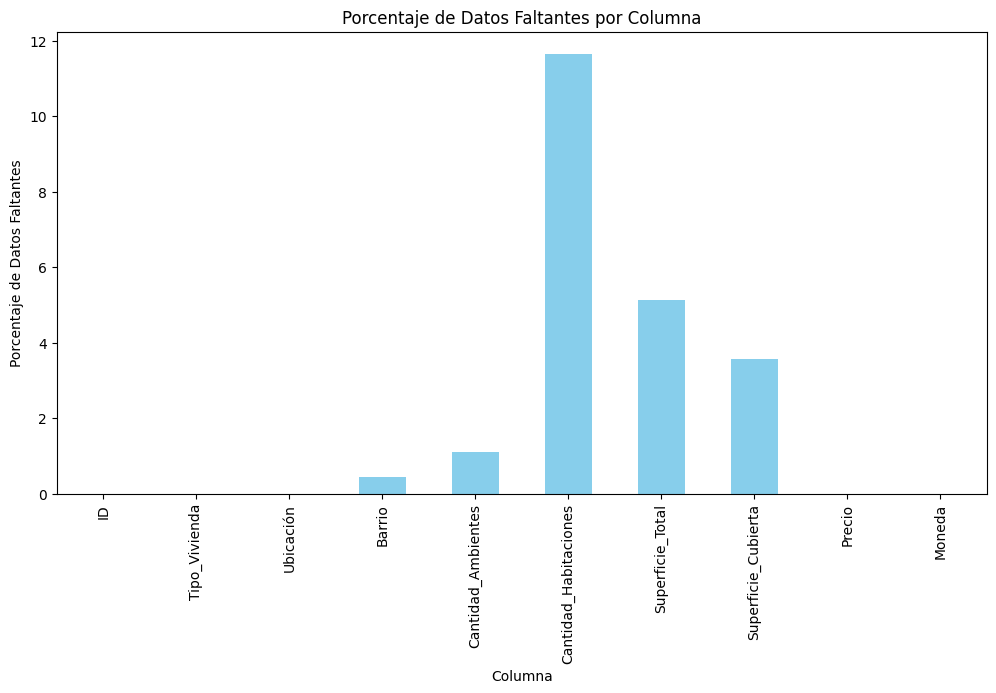

In [ ]:
# Calculo el porcentaje de datos faltantes por columna
porcentaje_faltantes_columna = (nuevo_df.isnull().sum() / len(nuevo_df)) * 100

# Creo un gráfico de barras para visualizar los porcentajes de datos faltantes por columna
plt.figure(figsize=(12, 6))
porcentaje_faltantes_columna.plot(kind='bar', color='skyblue')
plt.title('Porcentaje de Datos Faltantes por Columna')
plt.xlabel('Columna')
plt.ylabel('Porcentaje de Datos Faltantes')
plt.show()

Se observa como la columna 'Cantidad_Habitaciones' es la que registra el mayor porcentaje de valores nulos.
Quiero destacar que se muestra de 0 a 12 porque ese es el porcentaje total de datos nulos como se ve anteriormente.

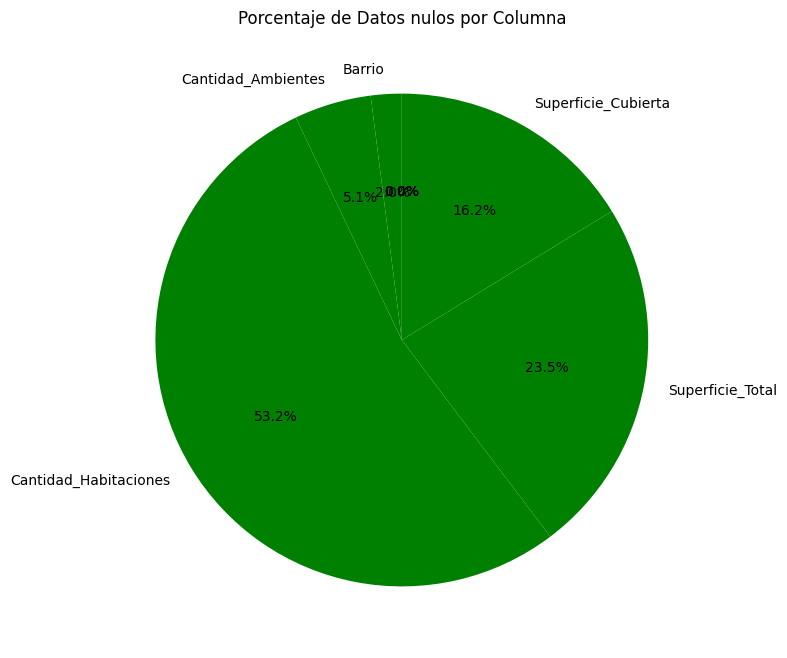

In [ ]:
# Calculo el porcentaje de datos nulos por columna
porcentaje_nulos_columna = (nuevo_df.isnull().sum() / len(nuevo_df)) * 100

# Creo un gráfico de torta para visualizar los porcentajes de datos nulos por columna
plt.figure(figsize=(8, 8))
porcentaje_nulos_columna.plot(kind='pie', autopct='%1.1f%%', startangle=90, colors=['green'] * len(porcentaje_faltantes_columna))
plt.title('Porcentaje de Datos nulos por Columna')
plt.show()

Podemos ver como es la distribucion de datos nulos.

### Datos nulos por fila

In [ ]:
datos_nulos_por_fila = nuevo_df.isnull().sum(axis=1)

# Muestro el número de datos nulos por fila
print("Datos nulos por fila:")
print(datos_nulos_por_fila)

Datos nulos por fila:
25        1
42        0
43        0
49        1
51        1
         ..
460072    0
460073    0
460074    0
460075    0
460090    0
Length: 94249, dtype: int64


In [ ]:
porcentaje_datos_nulos_por_fila = (nuevo_df.isnull().sum(axis=1) / len(nuevo_df.columns)) * 100

# Muestro el porcentaje de datos nulos por fila
print("Porcentaje de datos nulos por fila:")
print(porcentaje_datos_nulos_por_fila)

Porcentaje de datos nulos por fila:
25        10.0
42         0.0
43         0.0
49        10.0
51        10.0
          ... 
460072     0.0
460073     0.0
460074     0.0
460075     0.0
460090     0.0
Length: 94249, dtype: float64


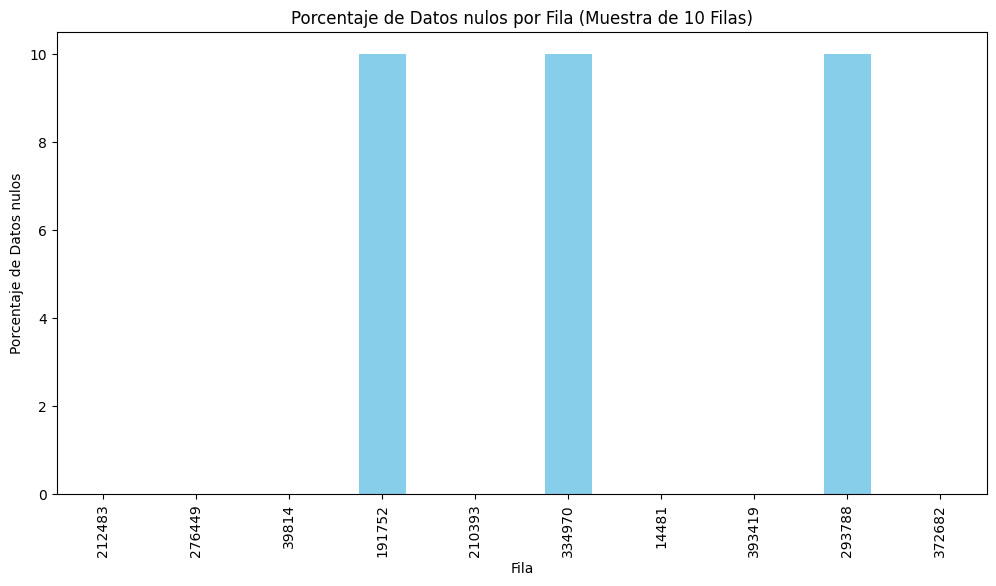

In [ ]:
# Selecciono 10 filas al azar a modo de muestra, ya que el dataframe tiene 94249 filas y tarda una eternidad en cargar.
filas_aleatorias = nuevo_df.sample(n=10, random_state=42)

# Calculo el porcentaje de datos nulos por fila
porcentaje_faltantes_fila = (filas_aleatorias.isnull().sum(axis=1) / len(filas_aleatorias.columns)) * 100

# Creo un gráfico de barras para visualizar los porcentajes de datos nulos por fila
plt.figure(figsize=(12, 6))
porcentaje_faltantes_fila.plot(kind='bar', color='skyblue')
plt.title('Porcentaje de Datos nulos por Fila (Muestra de 10 Filas)')
plt.xlabel('Fila')
plt.ylabel('Porcentaje de Datos nulos')
plt.show()

En este grafico de ejemplo podemos ver como 3 filas presentan al menos un dato nulo, es decir, que tienen un 10% de datos nulos.

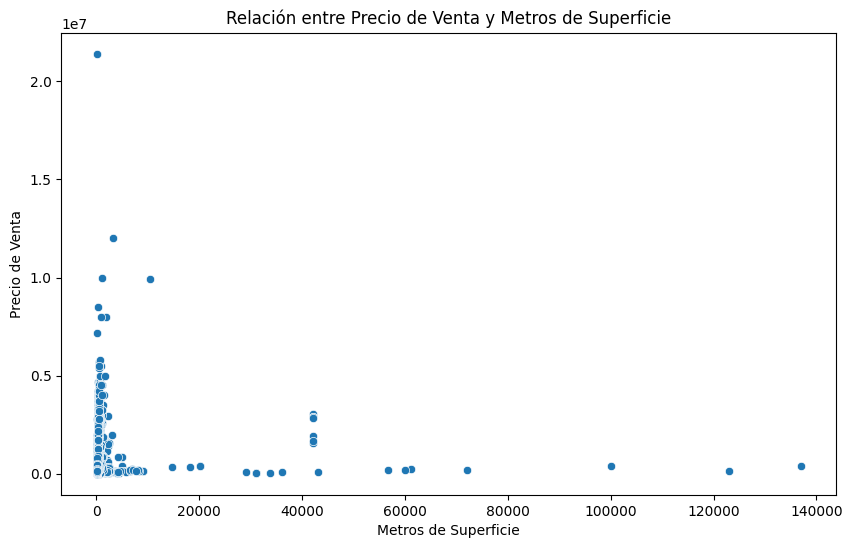

             Precio  Superficie_Total
count  9.424900e+04      89405.000000
mean   2.262382e+05        109.092970
std    3.186035e+05        980.401976
min    5.000000e+03         10.000000
25%    9.500000e+04         45.000000
50%    1.439000e+05         65.000000
75%    2.370000e+05        105.000000
max    2.140000e+07     137000.000000


In [ ]:
# Gráfico de dispersión para visualizar la relación
plt.figure(figsize=(10, 6))
sns.scatterplot(x='Superficie_Total', y='Precio', data=nuevo_df)
plt.title('Relación entre Precio de Venta y Metros de Superficie')
plt.xlabel('Metros de Superficie')
plt.ylabel('Precio de Venta')
plt.show()

# Estadísticas descriptivas para identificar valores atípicos
descripcion = nuevo_df[['Precio', 'Superficie_Total']].describe()
print(descripcion)

# Boxplot para visualizar posibles valores atípicos
plt.figure(figsize=(10, 6))
sns.boxplot(x='Superficie_Total', y='Precio', data=nuevo_df)
plt.title('Boxplot de Precio de Venta por Metros de Superficie')
plt.xlabel('Metros de Superficie')
plt.ylabel('Precio de Venta')
plt.show()

Gracias a estos graficos, podemos ver que a mayor superficie, mayor precio.
<br>
Esto tiene total sentido para mi, pero hay un dato que me llamó la atención. He notado que en ambos graficos, en la esquina superior izquierda, tengo una propiedad que es la más cara pero no tiene una superficie total que vaya de acuerdo con mi analisis, asi que voy a discriminarla a continuacón para poder estudiarla.

In [ ]:
# Encuentro el índice del máximo valor en la columna 'Precio'
indice_max_precio = nuevo_df['Precio'].idxmax()

# Muestro la fila correspondiente al índice del máximo valor en la columna 'Precio'
fila_max_precio = nuevo_df.loc[indice_max_precio]

print(f"Fila con el mayor valor en la columna 'Precio':")
print(fila_max_precio)

Fila con el mayor valor en la columna 'Precio':
ID                                 60074
Tipo_Vivienda               Departamento
Ubicación                Capital Federal
Barrio                         Caballito
Cantidad_Ambientes                   3.0
Cantidad_Habitaciones                NaN
Superficie_Total                    68.0
Superficie_Cubierta                 64.0
Precio                        21400000.0
Moneda                               USD
Name: 60073, dtype: object


Vemos que es una propiedad valuada en más de 21 millones de dolares, un valor irreal para un Deaprtamento en Caballito de 3 ambientes, en el cual no se registran habitaciones, que tiene 64 m² cubiertos de 68 m² totales.
<br>
Claramente se trata de un error, un precio más acercado a la realidad es de 214 mil dolares.

# Conclusión

Luego de analizar los datos que consideré más relevantes, llegué a las siguientes conclusiones:

*   Esta todo caro.
*   La situación habitacional en CABA es insostenible.
*   La situación economica no permite acceder siquiera a un alquiler.
*   Que el mercado inmobiliario este relentizado es conflictivo tanto para los inquilinos como para los propietarios, ya que no pueden alquilar y cobrar el alquiler, respectivamente.

Es de suma urgencia que las operaciones dejen de estar en dolares y a precios, potencialmente hablando, exorbitados ya que eso complica cumplir con el proyecto de tener una propiedad propia.





Me hubiera gustado que se tuviera en cuenta si se permiten mascotas o niños en las propiedades y que si estas son ofertadas por inmobiliarias o dueño directo.

Y como me dijo una compañera de cursada:
<br>
Siempre terraza, nunca sotano.